## Plot markers umap embeddings
Does this over each donor and separate

In [1]:
# Input info
se_f = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/SE.rds"
sample_names = "preB,postB"
outdir = "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers"

# Parameters
assay="RNA"

# Parallel processing
cores = 4

# R utils script
utils_script <- "/data/Mito_Trace/R_scripts/seurat_utils.R"



In [2]:
source(utils_script)
outdir = outdir
dir.create(outdir, showWarnings = FALSE)


Attaching SeuratObject



In [3]:
sample_names <- unlist(strsplit(sample_names, ",")[[1]])
sample_names

[1] "preB"  "postB"

In [4]:
library(GenomicRanges)
library(Seurat)
library(Signac)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v75)
library(ggplot2)
library(patchwork)
set.seed(1234)
library(data.table)
library(magrittr)
library(cowplot)
library(metap)
library("RColorBrewer")

library(future)
plan()

plan("multiprocess", workers = cores)
#options(future.globals.maxSize = 50000 * 1024^2) # for 50 Gb RAM
options(future.globals.maxSize = 8000 * 1024^2)

library(dplyr)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required package: ensembldb

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi

Lo

sequential:
- args: function (..., envir = parent.frame())
- tweaked: FALSE
- call: NULL

Warning message:
"Strategy 'multiprocess' is deprecated in future (>= 1.20.0). Instead, explicitly specify either 'multisession' or 'multicore'. In the current R session, 'multiprocess' equals 'multicore'."

Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:ensembldb':

    filter, select


The following object is masked from 'package:AnnotationDbi':

    select


The following object is masked from 'package:Biobase':

    combine


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from 'package

In [5]:
se <- readRDS(se_f)#file.path(indir, paste0("allSamples.integrated.rds")))
se

An object of class Seurat 
62328 features across 3683 samples within 2 assays 
Active assay: RNA (20010 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [6]:
markers_f <- "/data/Mito_Trace/data/processed/pbmc_markers.txt"
markers <- read.csv(markers_f, header=F)[[1]]

In [7]:
markers


[1] "TCRA"    "CD56"    "CD161"   "NCR1"    "NCAM1"   "CEACAM8" "IGHM"   
 [8] "TCRA"    "IL7R"    "CCR7"    "CD14"    "LYZ"     "IL7R"    "S100A4" 
[15] "MS4A1"   "CD8A"    "FCGR3A"  "MS4A7"   "FCGR3A"  "GNLY"    "NKG7"   
[22] "FCER1A"  "CST3"    "PPBP"

In [16]:
'TCRA' %in% toupper(rownames(se))

[1] FALSE

In [17]:
'TRA' %in% toupper(rownames(se))

[1] FALSE

In [18]:
'IGHM' %in% toupper(rownames(se))

[1] FALSE

In [41]:
'CD56' %in% rownames(se)

[1] FALSE

In [39]:
genes.upper <- sapply(rownames(se), function(x) {toupper(gsub("\\.", "_", gsub("-", "_", x)))})

In [58]:
'TRAV1' %in% (genes.upper)

[1] FALSE

In [59]:
'TRA1' %in% (genes.upper)

[1] FALSE

In [60]:
'TRAV' %in% (genes.upper)

[1] FALSE

In [61]:
'TRAV1_1' %in% (genes.upper)

[1] FALSE

In [62]:
'TRAV11' %in% (genes.upper)

[1] FALSE

In [63]:
"FCGR3A"  %in% (genes.upper)

[1] TRUE

In [64]:
genes.upper[grepl( "TRAV", genes.upper, fixed = TRUE)]


named character(0)

In [65]:
genes.upper[grepl( "TRA", genes.upper, fixed = TRUE)]


TRAPPC2      AGTRAP     TRAPPC3     TRABD2B    TRAF3IP3       TRAF5 
  "TRAPPC2"    "AGTRAP"   "TRAPPC3"   "TRABD2B"  "TRAF3IP3"     "TRAF5" 
      TRAM2    TRAF3IP2    TRAPPC3L      TRANK1       TRAK1       TRAIP 
    "TRAM2"  "TRAF3IP2"  "TRAPPC3L"    "TRANK1"     "TRAK1"     "TRAIP" 
      TRAT1       TRA2B       TRA2A       STRA8       STRAP      TRAFD1 
    "TRAT1"     "TRA2B"     "TRA2A"     "STRA8"     "STRAP"    "TRAFD1" 
      TRAF6     TRAPPC4       HTRA3     TRAM1L1    TRAPPC11     TRAPPC1 
    "TRAF6"   "TRAPPC4"     "HTRA3"   "TRAM1L1"  "TRAPPC11"   "TRAPPC1" 
      TRAF4      STRADA      STRA13    TRAPPC12      ATRAID       HTRA2 
    "TRAF4"    "STRADA"    "STRA13"  "TRAPPC12"    "ATRAID"     "HTRA2" 
    TRABD2A       TRAK2      STRADB    TRAF3IP1       TRAF7       TRAP1 
  "TRABD2A"     "TRAK2"    "STRADB"  "TRAF3IP1"     "TRAF7"     "TRAP1" 
      TRADD    TRAPPC2L       HTRA4       TRAM1     TRAPPC5    TRAPPC6A 
    "TRADD"  "TRAPPC2L"     "HTRA4"     "TRAM1"   "TRAPPC5"  "TRAPPC6A" 
  TRAPPC2P1       TRAF1       TRAF2    TRAPPC6B       TRAF3    TRAPPC13 
"TRAPPC2P1"     "TRAF1"     "TRAF2"  "TRAPPC6B"     "TRAF3"  "TRAPPC13" 
      TRABD       HTRA1     TRAPPC8       STRA6    TRAPPC10 
    "TRABD"     "HTRA1"   "TRAPPC8"     "STRA6"  "TRAPPC10"

In [20]:
sapply(markers, FUN=function(x){x %in% toupper(rownames(se))})

TCRA    CD56   CD161    NCR1   NCAM1 CEACAM8    IGHM    TCRA    IL7R    CCR7 
  FALSE   FALSE   FALSE    TRUE    TRUE    TRUE   FALSE   FALSE    TRUE    TRUE 
   CD14     LYZ    IL7R  S100A4   MS4A1    CD8A  FCGR3A   MS4A7  FCGR3A    GNLY 
   TRUE    TRUE    TRUE    TRUE    TRUE    TRUE    TRUE    TRUE    TRUE    TRUE 
   NKG7  FCER1A    CST3    PPBP 
   TRUE    TRUE    TRUE    TRUE

## Plot marker embeddings

In [7]:
featplot <- function(name.sig, se, curr.outdir){
    if (name.sig %in% rownames(se)){
    feat <- FeaturePlot(se,  features=name.sig)
    ggsave(plot=feat,
           file=file.path(curr.outdir, paste0(name.sig,".embedFeat.top.png")))
        }
    }

sapply(markers, FUN=featplot, se=se, curr.outdir=outdir)

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



$TCRA
NULL

$CD56
NULL

$CD161
NULL

$NCR1
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/NCR1.embedFeat.top.png"

$NCAM1
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/NCAM1.embedFeat.top.png"

$CEACAM8
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/CEACAM8.embedFeat.top.png"

$IGHM
NULL

$TCRA
NULL

$IL7R
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/IL7R.embedFeat.top.png"

$CCR7
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/CCR7.embedFeat.top.png"

$CD14
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/CD14.embedFeat.top.png"

$LYZ
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/LYZ.embedFeat.top.png"

$IL7R
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/IL7R.embedFeat.top.png"

$S100A4
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/S100A4.embedFeat.top.png"

$MS4A1
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/MS4A1.embedFeat.top.png"

$CD8A
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/CD8A.embedFeat.top.png"

$FCGR3A
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/FCGR3A.embedFeat.top.png"

$MS4A7
[1] "/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/MS4A7.embedFeat.top.png"

$FCGR3A
[1] "/data/Mito_Trace/output/pipeline/D

## Plot marker embeddings with peaks

In [8]:
DefaultAssay(se) <- "ATAC"
feature.names <- ClosestFeature(se, rownames(se))


In [9]:
# se <- FindTopFeatures(se, min.cutoff = 20)
# se <- BinarizeCounts(se)
# se <- RunTFIDF(se)
# se <- RunSVD(se)

In [ ]:
featplot <- function(name.sig, se, curr.outdir, feat.names=NULL){
    if (!is.null(feat.names)){
        name <- feat.names[name.sig,]
    }else{
        name <- name.sig
    }
    if (name.sig %in% rownames(se)){
    feat <- FeaturePlot(se,  features=name.sig) + ggtitle(name)
    ggsave(plot=feat,
           file=file.path(curr.outdir, paste0(name.sig,".embedFeat.top.png")))
        }
    }

In [10]:
marker.feature.names <- feature.names %>% filter(gene_name %in% markers)
rownames(marker.feature.names) <- marker.feature.names[,"query_region"]
marker.feature.names

marker.feature.names$name <- paste0(marker.feature.names$gene_name, "_", marker.feature.names$type)



sapply(rownames(marker.feature.names), 
       FUN=featplot, se=se, curr.outdir=outdir, feat.names=marker.feature.names["name"])

,tx_id,gene_name,gene_id,gene_biotype,type,closest_region,query_region,distance
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>
chr1-161523797-161524588,ENST00000540048,FCGR3A,ENSG00000203747,protein_coding,gap,chr1-161518469-161600157,chr1-161523797-161524588,0
chr1-161529790-161531534,ENST00000540048,FCGR3A,ENSG00000203747,protein_coding,gap,chr1-161518469-161600157,chr1-161529790-161531534,0
chr1-161539721-161540821,ENST00000540048,FCGR3A,ENSG00000203747,protein_coding,gap,chr1-161518469-161600157,chr1-161539721-161540821,0
chr1-161541921-161542393,ENST00000540048,FCGR3A,ENSG00000203747,protein_coding,gap,chr1-161518469-161600157,chr1-161541921-161542393,0
chr1-161555025-161555205,ENST00000540048,FCGR3A,ENSG00000203747,protein_coding,gap,chr1-161518469-161600157,chr1-161555025-161555205,0
chr1-161561347-161561621,ENST00000540048,FCGR3A,ENSG00000203747,protein_coding,gap,chr1-161518469-161600157,chr1-161561347-161561621,0
chr1-161566382-161566527,ENST00000540048,FCGR3A,ENSG00000203747,protein_coding,gap,chr1-161518469-161600157,chr1-161566382-161566527,0
chr5-35852400-35852876,ENST00000508941,IL7R,ENSG00000168685,protein_coding,utr,chr5-35852797-35853040,chr5-35852400-35852876,0
chr5-35853491-35855028,ENST00000511031,IL7R,ENSG00000168685,protein_coding,gap,chr5-35853041-35860953,chr5-35853491-35855028,0


## Run UMAP with just these markers

In [13]:
#genes.filter <- names(gene.percent.expressed[gene.percent.expressed>1])  #select genes expressed in at least 1% of cells
counts.sub <- GetAssayData(se)[rownames(marker.feature.names),]
counts.sub <- counts.sub[, (colSums(counts.sub)!=0)]

# curr_assay <- CreateChromatinAssay(curr.counts, fragments = frags.curr, min.cells = 10, min.features = 200)
# curr <- CreateSeuratObject(curr_assay, assay = "ATAC", project=name, meta.data=cells.meta)

immune.se <- CreateSeuratObject(counts=counts.sub,
                                assay = "ATAC", 
                                project="pbmc_markers", 
                                meta.data=se[[]][colnames(counts.sub), ])


# embed.atac <- function(se, outdir, lsi_start_comp=2, lsi_end_comp=50,reduction='lsi',
#                        neighbor_dim=30){
#     # Binarize and run LSI
#     se <- BinarizeCounts(se)
#     se <- RunTFIDF(se)
#     se <- RunSVD(se, n=lsi_end_comp )
#     se <- RunUMAP(se, dims = lsi_start_comp:lsi_end_comp, reduction = reduction)
#     #dimP <- DimPlot(se, group.by = "proj", pt.size = 0.1)
#     pDepthCorr <- DepthCor(se, reduction=reduction)
#     #ggsave(file.path(outdir,"integrated.depthCor.png"), plot=pDepthCorr, dpi=300)
#     #pDepthCorr
#         #integrated <- RunUMAP(object = integrated, reduction = 'integrated_lsi', dims = 2:30)
#     se <- FindNeighbors(object = se, reduction = 'lsi', dims = lsi_start_comp:neighbor_dim)
#     se <- FindClusters(object = se, verbose = FALSE, algorithm = 3)
#     return(c(se, pDepthCorr, dimP))
# }


# output <- embed.atac(immune.se, lsi_end_comp=10, neighbor_dim=5)
# immune.se <- output[1]
# pDepthCorr <- output[2]
# dimP <- output[3]

In [47]:
# Binarize and run LSI
immune.atac.se <- FindTopFeatures(immune.se, min.cutoff = 20)
immune.atac.se <- BinarizeCounts(immune.atac.se)
immune.atac.se <- RunTFIDF(immune.atac.se)
immune.atac.se <- RunSVD(immune.atac.se, n=10, irlba.work = 10)
immune.atac.se <- RunUMAP(immune.atac.se, dims = 2:10, reduction = 'lsi', n.neighbors=50)
#DimPlot(immune.atac.se, group.by = "proj", pt.size = 0.1)

#dimP <- DimPlot(immune.atac.se, group.by = "proj", pt.size = 0.1)

#ggsave(file.path(outdir,"integrated.depthCor.png"), plot=pDepthCorr, dpi=300)
#pDepthCorr
    #integrated <- RunUMAP(object = integrated, reduction = 'integrated_lsi', dims = 2:30)
immune.atac.se <- FindNeighbors(object = immune.atac.se, reduction = 'lsi', dims = 2:10)
immune.atac.se <- FindClusters(object = immune.atac.se, verbose = TRUE, algorithm = 3)


Performing TF-IDF normalization

Running SVD

Warning message in irlba(A = t(x = object), nv = n, work = irlba.work):
"You're computing too large a percentage of total singular values, use a standard svd instead."
Warning message in irlba(A = t(x = object), nv = n, work = irlba.work):
"did not converge--results might be invalid!; try increasing work or maxit"
Scaling cell embeddings

19:52:18 UMAP embedding parameters a = 0.9922 b = 1.112

19:52:18 Read 2653 rows and found 9 numeric columns

19:52:18 Using Annoy for neighbor search, n_neighbors = 50

19:52:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:52:19 Writing NN index file to temp file /tmp/RtmpmxO0Ue/file1e8792a035ffd

19:52:19 Searching Annoy index using 4 threads, search_k = 5000

19:52:19 Annoy recall

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2653
Number of edges: 138936

Running smart local moving algorithm...
Maximum modularity in 10 random starts: 0.8679
Number of communities: 30
Elapsed time: 0 seconds


Warning message:
"UNRELIABLE VALUE: One of the 'future.apply' iterations ('future_lapply-1') unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore"."


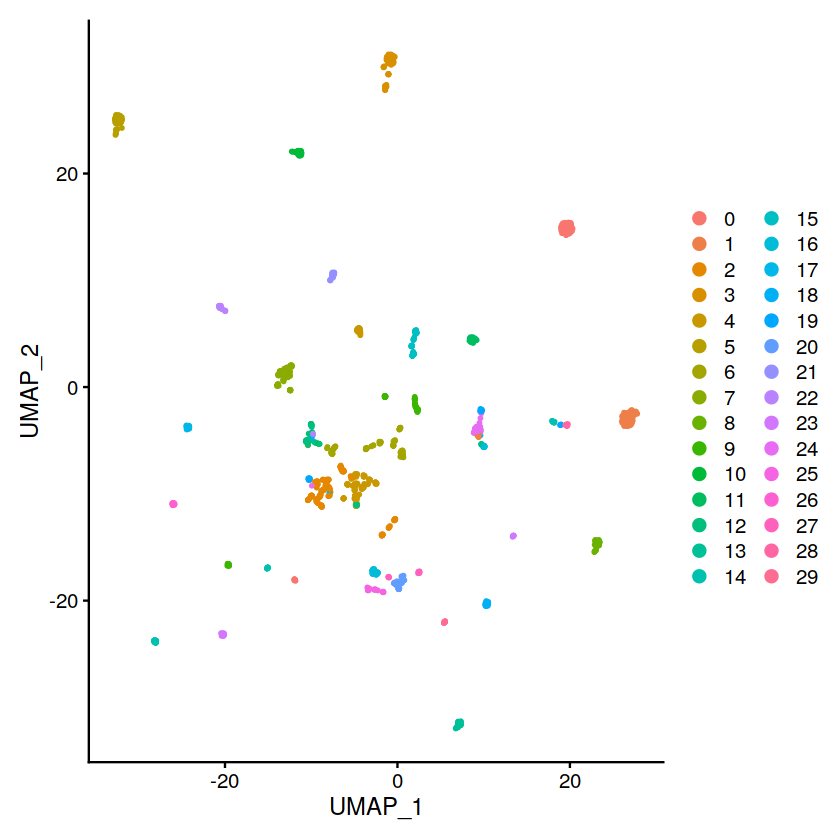

In [48]:
DimPlot(immune.atac.se)

In [49]:
small.umap.outdir <- file.path(outdir, "markersDimRed")
dir.create(small.umap.outdir)

# feature.names <- ClosestFeature(immune.atac.se, rownames(immune.atac.se))
# marker.feature.names <- feature.names %>% filter(gene_name %in% markers)
# rownames(marker.feature.names) <- marker.feature.names[,"query_region"]
# marker.feature.names

# marker.feature.names$name <- paste0(marker.feature.names$gene_name, "_", marker.feature.names$type)

sapply(rownames(marker.feature.names), 
       FUN=featplot, se=immune.atac.se, curr.outdir=small.umap.outdir, feat.names=marker.feature.names["name"])

Warning message in dir.create(small.umap.outdir):
"'/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/markersDimRed' already exists"
Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



chr1-161523797-161524588 
"/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/markersDimRed/chr1-161523797-161524588.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                        chr1-161529790-161531534 
"/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/markersDimRed/chr1-161529790-161531534.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                        chr1-161539721-161540821 
"/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/markersDimRed/chr1-161539721-161540821.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                        chr1-161541921-161542393 
"/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/markersDimRed/chr1-161541921-161542393.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                        chr1-161555025-161555205 
"/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/markersDimRed/chr1-161555025-161555205.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                        chr1-161561347-161561621 
"/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/concat/annotation_clones/umap_markers/markersDimRed/chr1-161561347-161561621.embedFeat.top.png" 
                                                                                                                                                                                                                                                                                                        chr1-161566382-161566527 
"/data/Mito_Trace/output/pipeline/DUPI_april08_2021/MTblacklist_mtasnucl_Bonly/data/merged/MT/cellr_True/numre

## Donor counts

donor,size
<fct>,<int>
0,530
1,626
2,344
3,2041
None,142


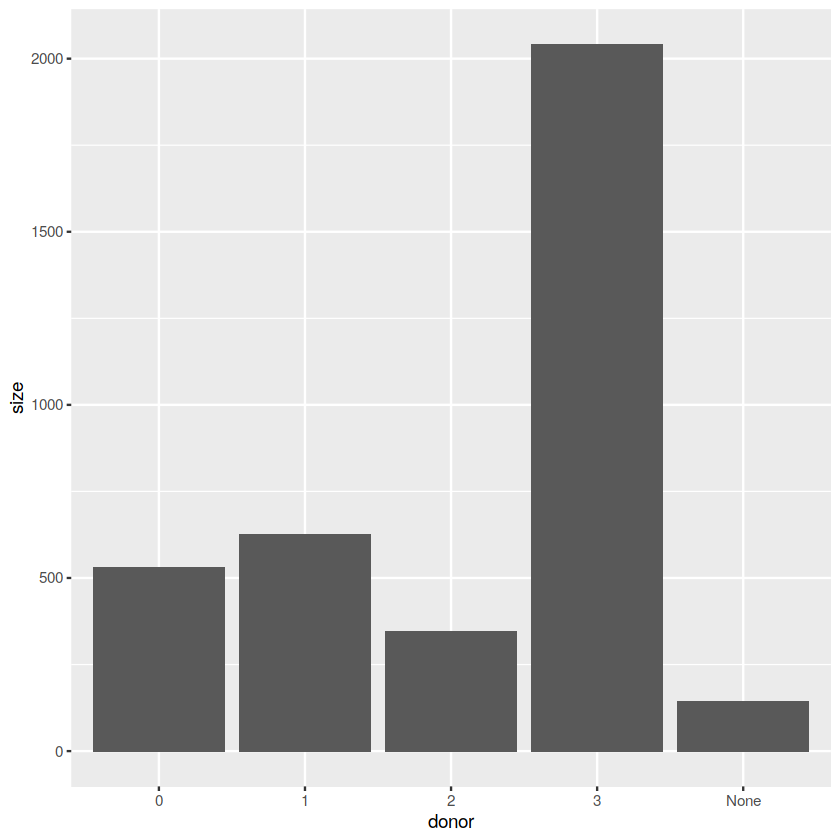

In [50]:
barplot.df <- se[[]] %>% dplyr::group_by(donor) %>% dplyr::summarize(size=dplyr::n())# %>% mutate(donor=donor)
# g <- ggplot(barplot.df[!(barplot.df$donor == "None" | is.na(barplot.df$donor)), ], aes(x=reorder(size), y=size, fill=donor)) + 
#             geom_bar(stat='identity')

g <- ggplot(barplot.df, aes(x=donor, y=size)) + 
            geom_bar(stat='identity')

g 
barplot.df

---

---

In [11]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS/LAPACK: /home/isaac/miniconda3/envs/mttrace/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] future_1.23.0             RColorBrewer_1.1-2       
 [3] metap_1.1                 cowplot_1.1.1            
 [5] magrittr_2.0.1            data.table_1.14.2        
 [7] patchwork_1.1.1           ggplot2_3.3.5            
 [9] EnsDb.Hsapiens.v75_2.99.0 ensembldb_2.18.1         
[11] 